In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

In [2]:
# Define the path to your dataset
dataset_path = 'test1/color_images'  # Replace with the path to your dataset
output_path = 'test1/output_images'  # Folder to save processed images

# Create the output folder if it doesn't exist
if not os.path.exists(output_path):
    os.makedirs(output_path)

In [3]:
# List all color images in the dataset folder
color_images = [img for img in os.listdir(dataset_path) if img.endswith(('.jpg', '.png', '.jpeg'))]

In [7]:
output_path = 'test1/output_images/grayscale_images'  # Folder to save processed images
if not os.path.exists(output_path):
    os.makedirs(output_path)

    
for image_name in color_images:
    # Load the color image
    color_image = cv2.imread(os.path.join(dataset_path, image_name))
    
    # Convert the color image to grayscale
    grayscale_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)
    
    # Normalize pixel values to [0, 1]
    normalized_image = grayscale_image / 255.0
    
    # Save the grayscale image
    cv2.imwrite(os.path.join(output_path, f'{image_name}_grayscale.jpg'), grayscale_image)
    
    print(f'Processed {image_name} and saved grayscale image.')

Processed 0001-image20056.jpg and saved grayscale image.
Processed 0002-image04733.jpg and saved grayscale image.
Processed 0003-image07098.jpg and saved grayscale image.
Processed 0004-image64929.jpg and saved grayscale image.
Processed 0005-image15367.jpg and saved grayscale image.
Processed 0006-image21655.jpg and saved grayscale image.
Processed 0007-image60542.jpg and saved grayscale image.
Processed 0008-image20752.jpg and saved grayscale image.
Processed 0009-image00550.jpg and saved grayscale image.
Processed 0010-image00597.jpg and saved grayscale image.


In [13]:
def load_images_from_folder(folder):
    """Load images from a folder and return them as a list."""
    images = []
    for filename in sorted(os.listdir(folder)):  # Sorting ensures correct order
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for correct colors in Matplotlib
            images.append(img)
    return images

In [14]:
def show_images(dataset1, dataset2):
    """
    Display images in two rows:
    - First row: Original images from dataset1
    - Second row: Processed images from dataset2
    """
    images1 = load_images_from_folder(dataset1)
    images2 = load_images_from_folder(dataset2)

    num_images = min(len(images1), len(images2))  # Ensure equal number of images
    fig, axes = plt.subplots(2, num_images, figsize=(15, 6))  # 2 rows, dynamic columns

    for i in range(num_images):
        # Display original images in the first row
        axes[0, i].imshow(images1[i])
        axes[0, i].axis("off")
        axes[0, i].set_title(f"Original {i+1}")

        # Display processed images in the second row
        axes[1, i].imshow(images2[i])
        axes[1, i].axis("off")
        axes[1, i].set_title(f"Processed {i+1}")

    plt.tight_layout()
    plt.show()

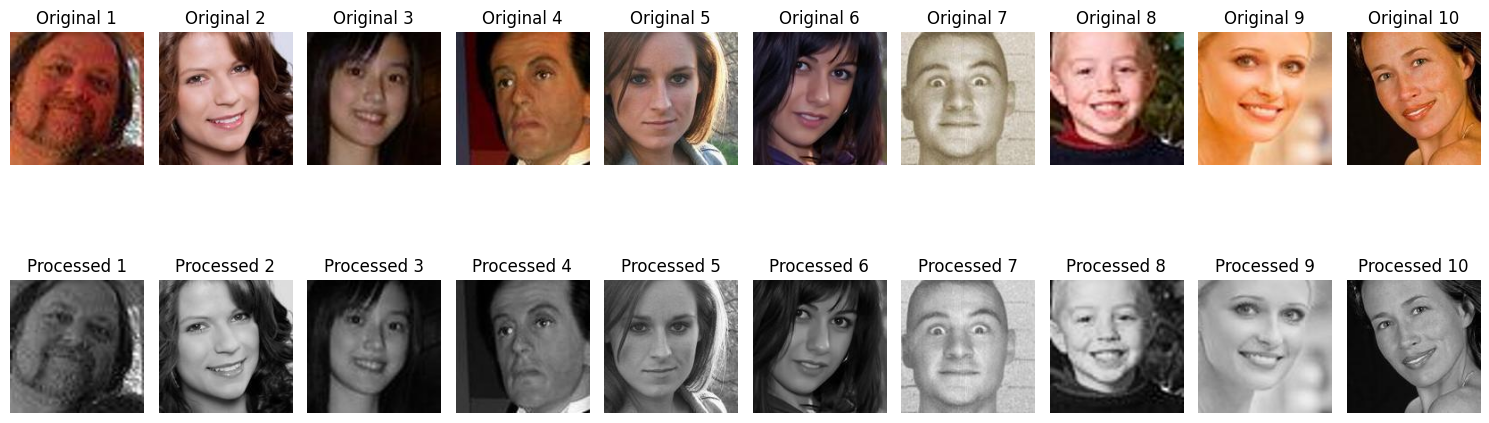

In [16]:
# Example Usage:
dataset1_path = "test1/color_images"
dataset2_path = "test1/output_images/grayscale_images"
show_images(dataset1_path, dataset2_path)

Apply edge detection (e.g., Sobel or Canny filters).

Apply spatial filters (e.g., Gaussian or median filters).

In [9]:
output_path = 'test1/output_images/edge_detection_images'  # Folder to save processed images
if not os.path.exists(output_path):
    os.makedirs(output_path)

grayscale_path= 'test1/output_images/grayscale_images'

for image_name in color_images:
    # Load the grayscale image
    grayscale_image = cv2.imread(os.path.join(grayscale_path, f'{image_name}_grayscale.jpg'), cv2.IMREAD_GRAYSCALE)
    
    # Apply Sobel edge detection
    sobel_x = cv2.Sobel(grayscale_image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(grayscale_image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_edges = np.sqrt(sobel_x**2 + sobel_y**2)
    
    # Normalize and save the edge-detected image
    sobel_edges = cv2.normalize(sobel_edges, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    cv2.imwrite(os.path.join(output_path, f'{image_name}_sobel_edges.jpg'), sobel_edges)
    
    print(f'Applied Sobel edge detection to {image_name}.')

Applied Sobel edge detection to 0001-image20056.jpg.
Applied Sobel edge detection to 0002-image04733.jpg.
Applied Sobel edge detection to 0003-image07098.jpg.
Applied Sobel edge detection to 0004-image64929.jpg.
Applied Sobel edge detection to 0005-image15367.jpg.
Applied Sobel edge detection to 0006-image21655.jpg.
Applied Sobel edge detection to 0007-image60542.jpg.
Applied Sobel edge detection to 0008-image20752.jpg.
Applied Sobel edge detection to 0009-image00550.jpg.
Applied Sobel edge detection to 0010-image00597.jpg.


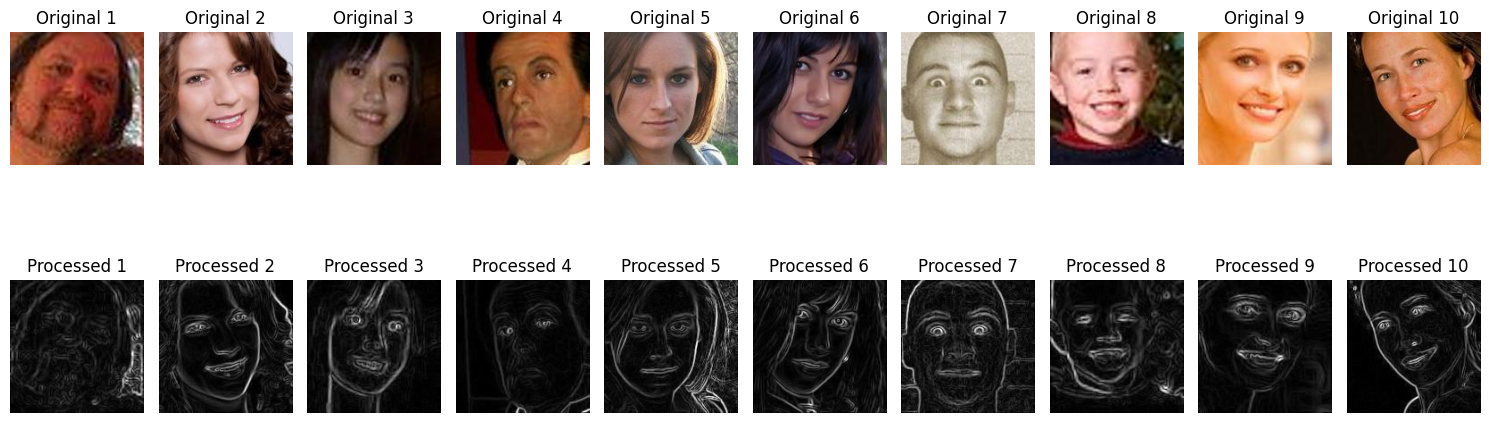

In [17]:
# Example Usage:
dataset1_path = "test1/color_images"
dataset2_path = "test1/output_images/edge_detection_images"
show_images(dataset1_path, dataset2_path)

Gaussian smoothing

In [10]:
output_path = 'test1/output_images/gaussian_smooth_images'  # Folder to save processed images
if not os.path.exists(output_path):
    os.makedirs(output_path)

grayscale_path= 'test1/output_images/grayscale_images'

for image_name in color_images:
    # Load the grayscale image
    grayscale_image = cv2.imread(os.path.join(grayscale_path, f'{image_name}_grayscale.jpg'), cv2.IMREAD_GRAYSCALE)
    
    # Apply Gaussian smoothing
    smoothed_image = cv2.GaussianBlur(grayscale_image, (5, 5), 0)
    
    # Save the smoothed image
    cv2.imwrite(os.path.join(output_path, f'{image_name}_smoothed.jpg'), smoothed_image)
    
    print(f'Applied Gaussian smoothing to {image_name}.')

Applied Gaussian smoothing to 0001-image20056.jpg.
Applied Gaussian smoothing to 0002-image04733.jpg.
Applied Gaussian smoothing to 0003-image07098.jpg.
Applied Gaussian smoothing to 0004-image64929.jpg.
Applied Gaussian smoothing to 0005-image15367.jpg.
Applied Gaussian smoothing to 0006-image21655.jpg.
Applied Gaussian smoothing to 0007-image60542.jpg.
Applied Gaussian smoothing to 0008-image20752.jpg.
Applied Gaussian smoothing to 0009-image00550.jpg.
Applied Gaussian smoothing to 0010-image00597.jpg.


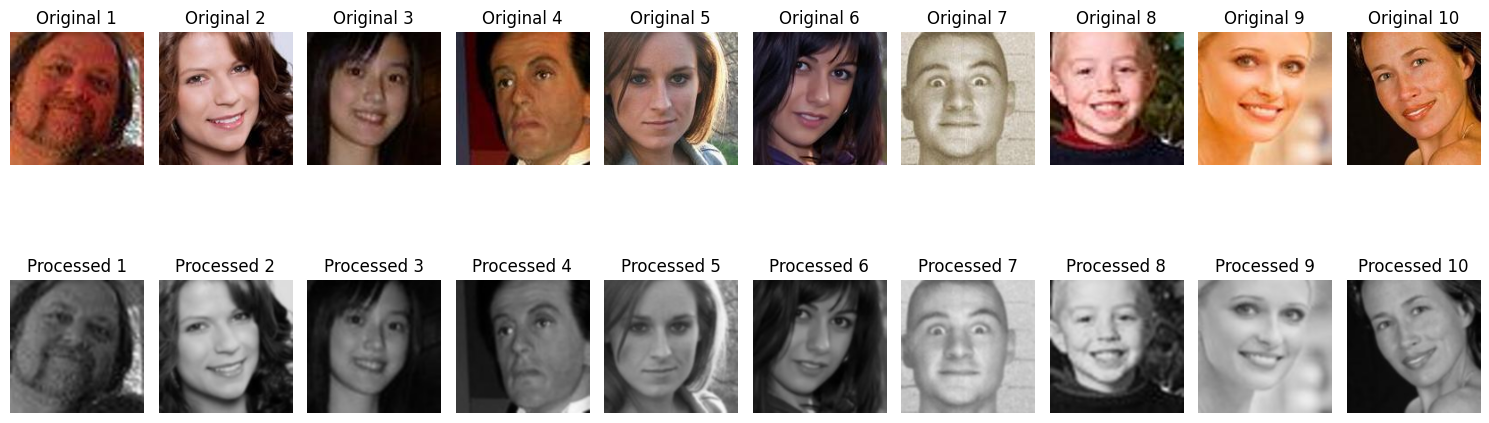

In [18]:
# Example Usage:
dataset1_path = "test1/color_images"
dataset2_path = "test1/output_images/gaussian_smooth_images"
show_images(dataset1_path, dataset2_path)

fourier transform

In [12]:
output_path = 'test1/output_images/f_transform_images'  # Folder to save processed images
if not os.path.exists(output_path):
    os.makedirs(output_path)

grayscale_path= 'test1/output_images/grayscale_images'

for image_name in color_images:
    # Load the grayscale image
    grayscale_image = cv2.imread(os.path.join(grayscale_path, f'{image_name}_grayscale.jpg'), cv2.IMREAD_GRAYSCALE)
    
    # Compute the Fourier Transform
    f = np.fft.fft2(grayscale_image)
    fshift = np.fft.fftshift(f)  # Shift zero frequency to the center
    magnitude_spectrum = 20 * np.log(np.abs(fshift))
    
    # Save the magnitude spectrum
    magnitude_spectrum = cv2.normalize(magnitude_spectrum, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    cv2.imwrite(os.path.join(output_path, f'{image_name}_magnitude_spectrum.jpg'), magnitude_spectrum)
    
    print(f'Computed Fourier Transform for {image_name}.')

Computed Fourier Transform for 0001-image20056.jpg.
Computed Fourier Transform for 0002-image04733.jpg.
Computed Fourier Transform for 0003-image07098.jpg.
Computed Fourier Transform for 0004-image64929.jpg.
Computed Fourier Transform for 0005-image15367.jpg.
Computed Fourier Transform for 0006-image21655.jpg.
Computed Fourier Transform for 0007-image60542.jpg.
Computed Fourier Transform for 0008-image20752.jpg.
Computed Fourier Transform for 0009-image00550.jpg.
Computed Fourier Transform for 0010-image00597.jpg.


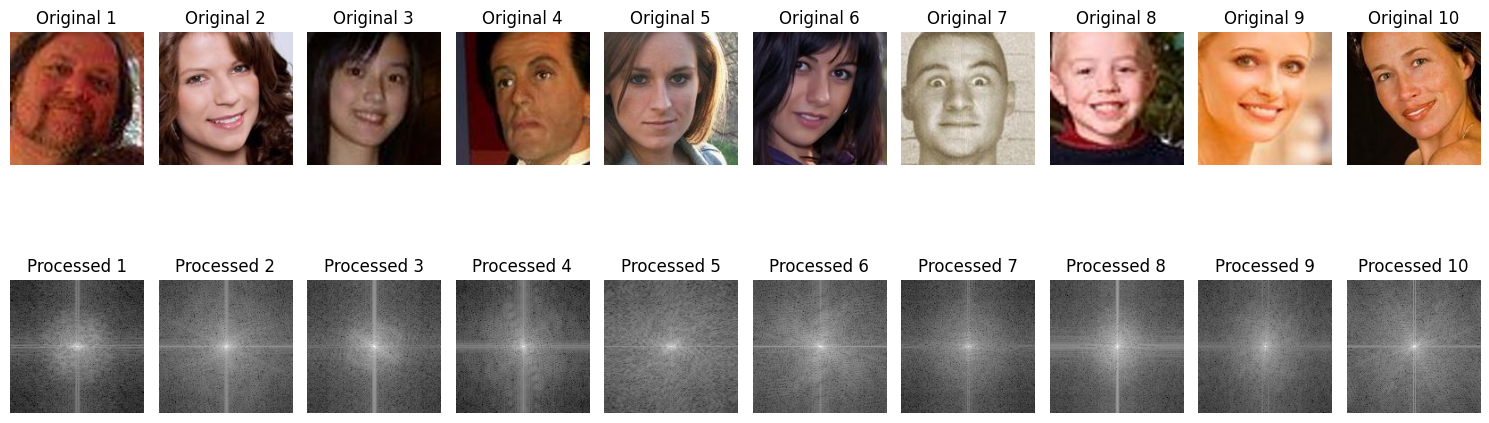

In [19]:
# Example Usage:
dataset1_path = "test1/color_images"
dataset2_path = "test1/output_images/f_transform_images"
show_images(dataset1_path, dataset2_path)

laplass filter

In [21]:
output_path = 'test1/output_images/low_pass_filter_images'  # Folder to save processed images
if not os.path.exists(output_path):
    os.makedirs(output_path)

grayscale_path= 'test1/output_images/grayscale_images'


for image_name in color_images:
    # Load the grayscale image
    grayscale_image = cv2.imread(os.path.join(grayscale_path, f'{image_name}_grayscale.jpg'), cv2.IMREAD_GRAYSCALE)
    
    # Compute the Fourier Transform
    f = np.fft.fft2(grayscale_image)
    fshift = np.fft.fftshift(f)
    
    # Create a low-pass filter mask
    rows, cols = grayscale_image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    r = 30  # Radius of the low-pass filter
    center = [crow, ccol]
    x, y = np.ogrid[:rows, :cols]
    mask_area = (x - center[0])**2 + (y - center[1])**2 <= r**2
    mask[mask_area] = 1
    
    # Apply the mask and inverse Fourier Transform
    fshift_filtered = fshift * mask
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_filtered = np.fft.ifft2(f_ishift)
    img_filtered = np.abs(img_filtered)
    
    # Save the filtered image
    img_filtered = cv2.normalize(img_filtered, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    cv2.imwrite(os.path.join(output_path, f'{image_name}_lowpass_filtered.jpg'), img_filtered)
    
    print(f'Applied low-pass filtering to {image_name}.')

Applied low-pass filtering to 0001-image20056.jpg.
Applied low-pass filtering to 0002-image04733.jpg.
Applied low-pass filtering to 0003-image07098.jpg.
Applied low-pass filtering to 0004-image64929.jpg.
Applied low-pass filtering to 0005-image15367.jpg.
Applied low-pass filtering to 0006-image21655.jpg.
Applied low-pass filtering to 0007-image60542.jpg.
Applied low-pass filtering to 0008-image20752.jpg.
Applied low-pass filtering to 0009-image00550.jpg.
Applied low-pass filtering to 0010-image00597.jpg.


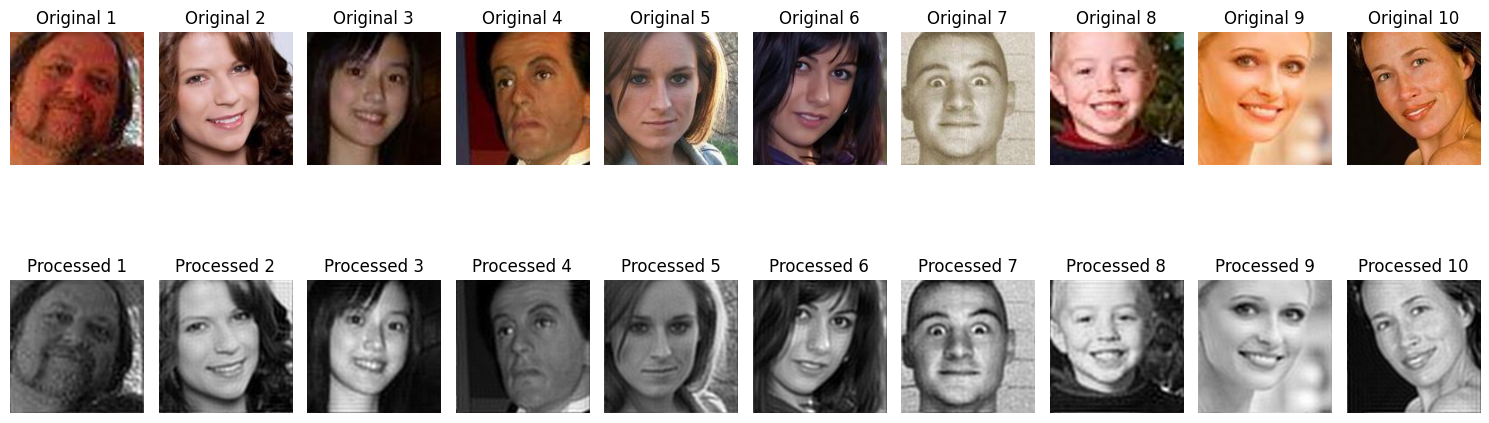

In [22]:
# Example Usage:
dataset1_path = "test1/color_images"
dataset2_path = "test1/output_images/low_pass_filter_images"
show_images(dataset1_path, dataset2_path)

Color Mapping and Reconstruction

In [25]:
output_path = 'test1/output_images/color_mapping_images'  # Folder to save processed images
if not os.path.exists(output_path):
    os.makedirs(output_path)

grayscale_path= 'test1/output_images/grayscale_images'

def map_intensity_to_color(intensity):
    if intensity < 85:
        return [255, 0, 0]  # Red for low intensity
    elif intensity < 170:
        return [0, 255, 0]  # Green for medium intensity
    else:
        return [0, 0, 255]  # Blue for high intensity

for image_name in color_images:
    # Load the grayscale image
    grayscale_image = cv2.imread(os.path.join(grayscale_path, f'{image_name}_grayscale.jpg'), cv2.IMREAD_GRAYSCALE)
    
    # Apply color mapping
    colorized_image = np.zeros((grayscale_image.shape[0], grayscale_image.shape[1], 3), dtype=np.uint8)
    for i in range(grayscale_image.shape[0]):
        for j in range(grayscale_image.shape[1]):
            colorized_image[i, j] = map_intensity_to_color(grayscale_image[i, j])
    
    # Save the colorized image
    cv2.imwrite(os.path.join(output_path, f'{image_name}_colorized.jpg'), colorized_image)
    
    print(f'Colorized {image_name}.')

Colorized 0001-image20056.jpg.
Colorized 0002-image04733.jpg.
Colorized 0003-image07098.jpg.
Colorized 0004-image64929.jpg.
Colorized 0005-image15367.jpg.
Colorized 0006-image21655.jpg.
Colorized 0007-image60542.jpg.
Colorized 0008-image20752.jpg.
Colorized 0009-image00550.jpg.
Colorized 0010-image00597.jpg.


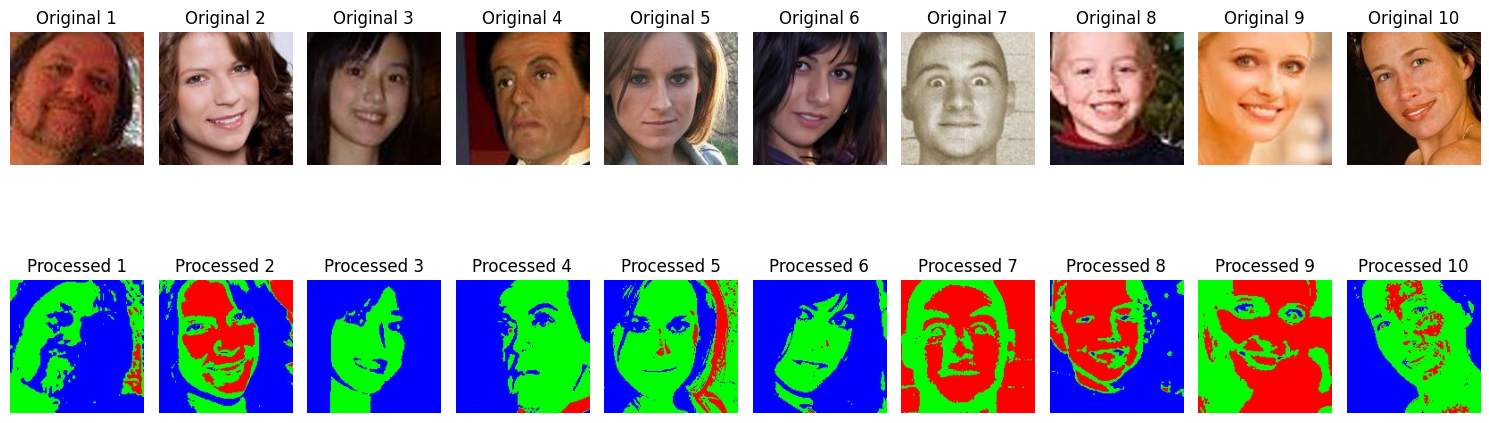

In [26]:
# Example Usage:
dataset1_path = "test1/color_images"
dataset2_path = "test1/output_images/color_mapping_images"
show_images(dataset1_path, dataset2_path)

In [27]:
output_path = 'test1/output_images/blended_images'  # Folder to save processed images
if not os.path.exists(output_path):
    os.makedirs(output_path)

colorized_path= 'test1/output_images/color_mapping_images'

for image_name in color_images:
    # Load the colorized image
    colorized_image = cv2.imread(os.path.join(colorized_path, f'{image_name}_colorized.jpg'))
    
    # Apply Gaussian smoothing to blend regions
    blended_image = cv2.GaussianBlur(colorized_image, (15, 15), 0)
    
    # Save the blended image
    cv2.imwrite(os.path.join(output_path, f'{image_name}_blended.jpg'), blended_image)
    
    print(f'Blended regions for {image_name}.')

Blended regions for 0001-image20056.jpg.
Blended regions for 0002-image04733.jpg.
Blended regions for 0003-image07098.jpg.
Blended regions for 0004-image64929.jpg.
Blended regions for 0005-image15367.jpg.
Blended regions for 0006-image21655.jpg.
Blended regions for 0007-image60542.jpg.
Blended regions for 0008-image20752.jpg.
Blended regions for 0009-image00550.jpg.
Blended regions for 0010-image00597.jpg.


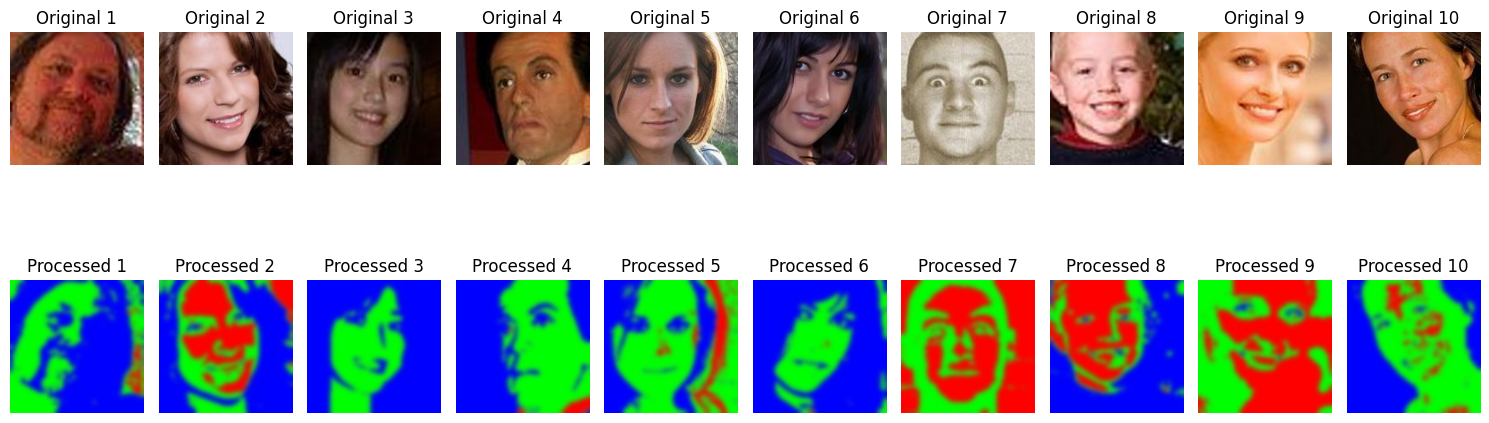

In [28]:
# Example Usage:
dataset1_path = "test1/color_images"
dataset2_path = "test1/output_images/blended_images"
show_images(dataset1_path, dataset2_path)

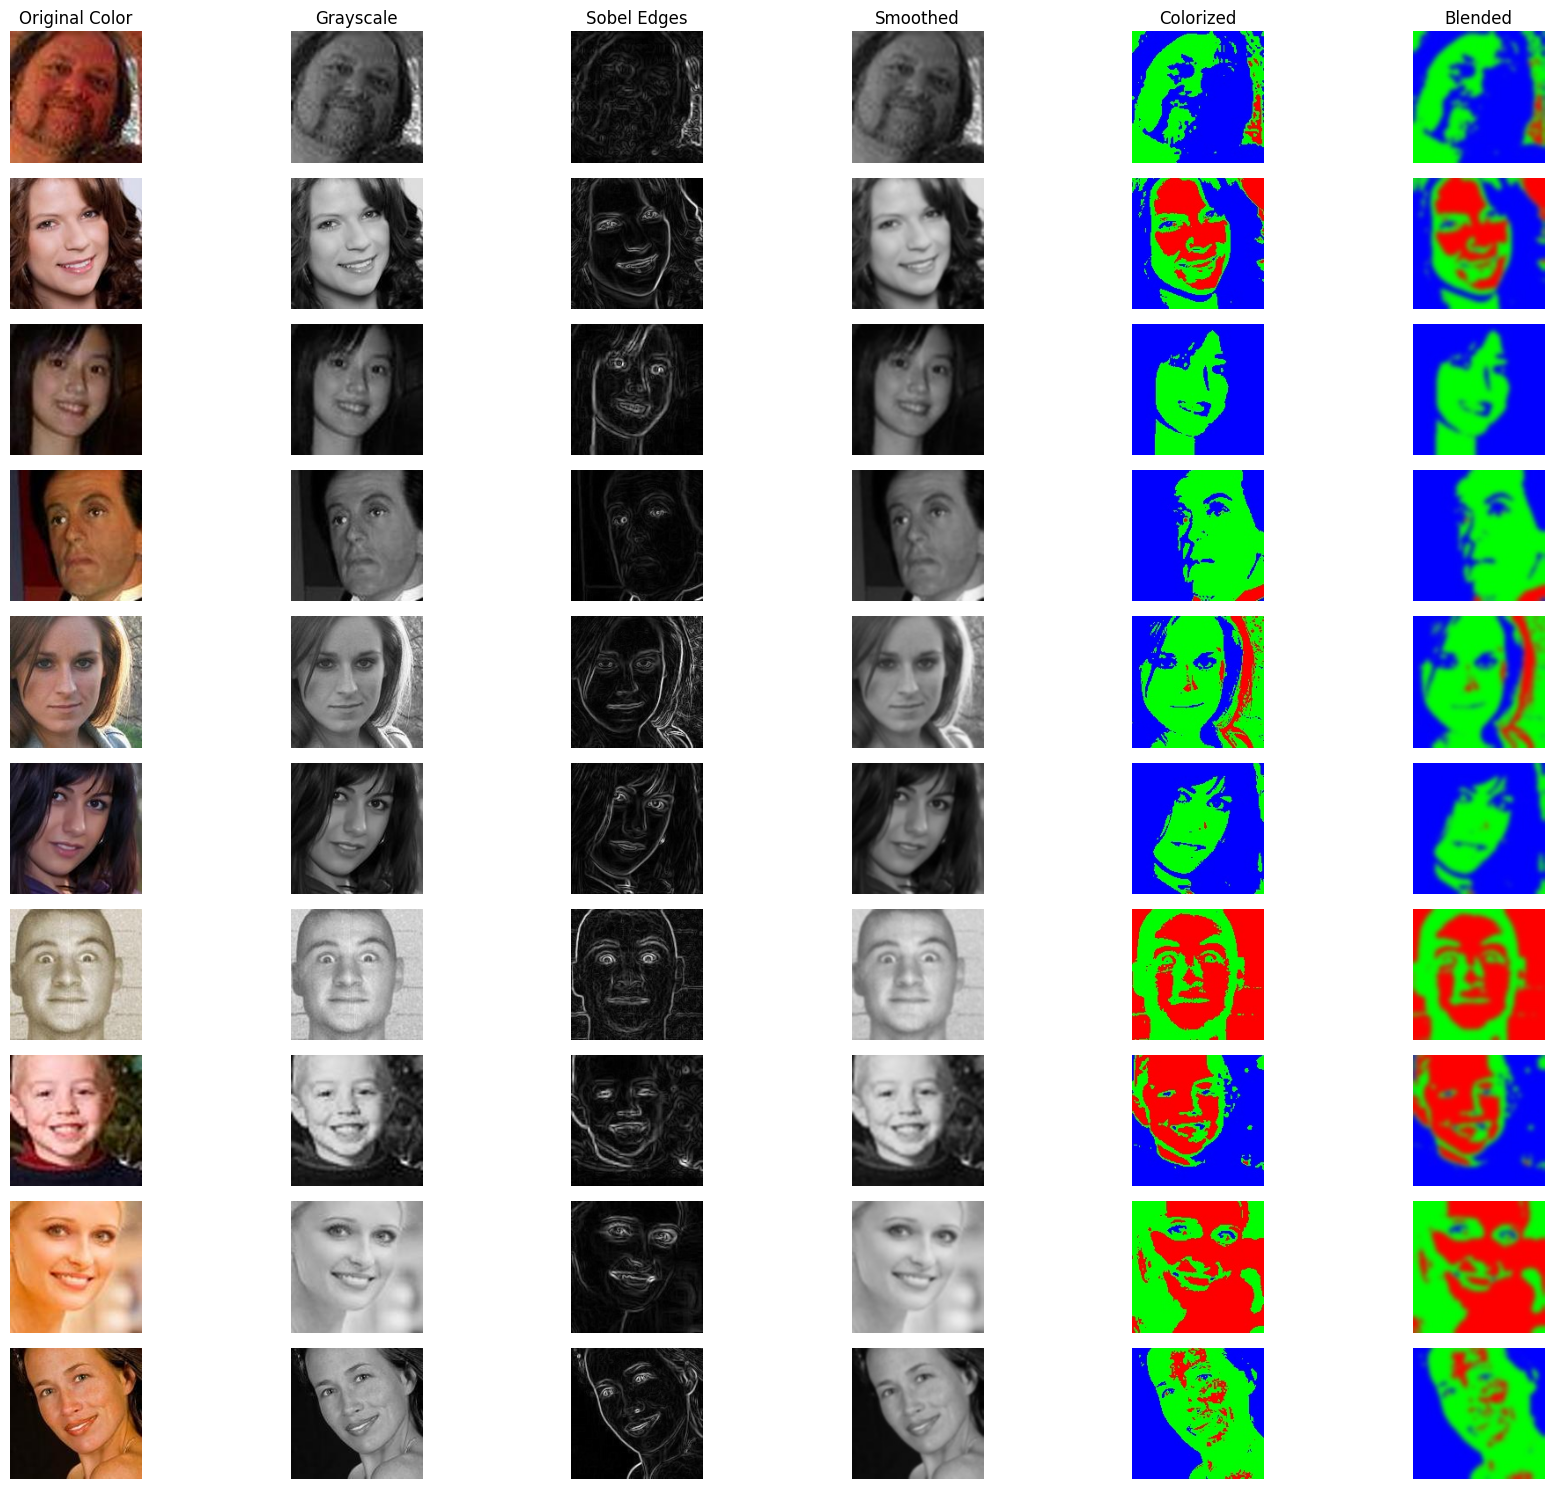

In [35]:
# Define paths
dataset_path = 'test1/color_images'  # Path to original color images
output_path = 'test1/output_images'  # Base path for processed images

# List all color images in the dataset folder and limit to 10
color_images = sorted([img for img in os.listdir(dataset_path) if img.endswith(('.jpg', '.png', '.jpeg'))])[:10]

# Function to display images in 10 rows (one for each image), 6 columns (one for each processing step)
def display_images(image_filenames):
    num_images = len(image_filenames)
    
    fig, axes = plt.subplots(num_images, 6, figsize=(18, 15))  # 10 rows (images) × 6 columns (processing steps)
    
    # Titles for each processing step
    step_titles = ['Original Color', 'Grayscale', 'Sobel Edges', 'Smoothed', 'Colorized', 'Blended']

    for row, img_name in enumerate(image_filenames):
        base_name = os.path.splitext(img_name)[0]  # Remove file extension

        # Define paths for different image processing results
        image_paths = [
            os.path.join(dataset_path, img_name),  # Original color image
            os.path.join(output_path, 'grayscale_images', f'{base_name}.jpg_grayscale.jpg'),  # Grayscale image
            os.path.join(output_path, 'edge_detection_images', f'{base_name}.jpg_sobel_edges.jpg'),  # Sobel edges
            os.path.join(output_path, 'gaussian_smooth_images', f'{base_name}.jpg_smoothed.jpg'),  # Gaussian smoothed
            os.path.join(output_path, 'color_mapping_images', f'{base_name}.jpg_colorized.jpg'),  # Colorized image
            os.path.join(output_path, 'blended_images', f'{base_name}.jpg_blended.jpg')  # Blended image
        ]

        for col, image_path in enumerate(image_paths):
            image = cv2.imread(image_path)

            if image is not None:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct color display
                axes[row, col].imshow(image)
            else:
                axes[row, col].text(0.5, 0.5, "Not Found", fontsize=12, ha='center')

            axes[row, col].axis('off')

            # Set column titles only for the first row
            if row == 0:
                axes[row, col].set_title(step_titles[col], fontsize=12)

    plt.tight_layout()
    plt.show()

# Display all 10 images with their processing stages
display_images(color_images)
